We customize the output from `cabinetry` via a helper function. This is optional, and the `logging` module can be used directly as well to further customize the behavior.

In [1]:
import cabinetry
cabinetry.set_logging()

Download a workspace from HEPData, extract it, pick a signal with `pyhf`. We use a workspace from an ATLAS search for bottom-squark pair production: [JHEP 12 (2019) 060](https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/SUSY-2018-31/). The corresponding HEPData entry is [10.17182/hepdata.89408.v3](https://doi.org/10.17182/hepdata.89408.v3).

In [2]:
import numpy as np
import matplotlib.pyplot as plt # for plotting

import json
import pyhf
from pyhf.contrib.utils import download
#https://www.hepdata.net/record/ins1869695, "4top"
#https://www.hepdata.net/record/ins1802524, "ttbar"
#https://www.hepdata.net/record/ins1843001, "leptoquark"
#https://www.hepdata.net/record/ins2905977, "vector-like lepton"
#https://www.hepdata.net/record/ins2043503, "displaced jets"
#https://www.hepdata.net/record/ins1847643, "Htb"

# download("https://www.hepdata.net/record/resource/1935437?view=true", "bottom-squarks")
#ws_bkg = pyhf.Workspace(json.load(open("bottom-squarks/RegionA/BkgOnly.json")))
#patchset = pyhf.PatchSet(json.load(open("bottom-squarks/RegionA/patchset.json")))
#ws = patchset.apply(ws_bkg, "sbottom_600_280_150")
#cabinetry.workspace.save(ws, "bottom-squarks.json")

download("https://www.hepdata.net/record/resource/2695562?view=true", "leptoquark")
ws_bkg = pyhf.Workspace(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/BGOnly.json")))
patchset = pyhf.PatchSet(json.load(open("leptoquark/workspaces_LQLQ_ttauttau/LQLQ_ttauttau_patchset.json")))
ws = patchset.apply(ws_bkg, "LQd_M1000_B0p05")
# #jsonfile="LQLQ.json"
# #cabinetry.workspace.save(ws, jsonfile)

#download("https://www.hepdata.net/record/resource/3898139?view=true", "vectorlepton")
#ws = pyhf.Workspace(json.load(open("vectorlepton/json2/VLL_M1000.json")))

#download("https://www.hepdata.net/record/resource/3170100?view=true","displacedjets")

#download("https://www.hepdata.net/record/resource/1986718?view=true","Htb")
#ws = pyhf.Workspace(json.load(open("Htb/Hp1000_config.json")))

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.patchset - Validating spec against schema: patchset.json
INFO - pyhf.workspace - Validating spec against schema: workspace.json


The `bottom-squarks.json` workspace is now ready to be used. We will run a maximum likelihood fit with `cabinetry` and visualize the results. First, we have a brief look at the content of the workspace:

The fit model specified in the workspace is created next.

In [10]:
#ws = cabinetry.workspace.load(jsonfile)
#model, data = cabinetry.model_utils.model_and_data(ws)
#ws=ws_bkg

model =  ws.model()
data   = ws.data(model)

INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier LQSignal_Acceptance_PDF_lowmass (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier LQSignal_Acceptance_Var3c (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier LQSignal_Acceptance_scale (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_MU_SF_Isol_Stat (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_MU_SF_Isol_Syst (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_EG_SCALE (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_EL_SF_ID (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_JES_Flavor_Comp (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_JES_Flavor_Resp (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_JES_NP_Mix1 (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier ATLAS_JES_NP_Mod1 (1 new nuisance parameters)
INFO - pyhf.pdf - a

We can take a look at a yield table for this model. We first generate the pre-fit model prediction, and then pass it to a function to produce a yield table from it.

In [11]:
print("\nWorkspace info")
print(f'     samples: {ws.samples}')
print(f'   modifiers: {ws.modifiers}')
print(f'    channels: {ws.channels}')
print(f'       nbins: {ws.channel_nbins}')
#print(f'  parameters: {ws.parameters}')
print(f'observations: {ws.observations}')
print(f' measurement: {ws.measurement_names}')
print(f' measurement: {ws.get_measurement}') #Can feed poi name of measuremnt name
print(f' data: {ws.data}')
print(f' model: {ws.model}')
print("\n")



Workspace info
     samples: ['LQd_M1000_B0p05']
   modifiers: [('ATLAS_EG_RES', 'normsys'), ('ATLAS_EG_SCALE', 'histosys'), ('ATLAS_EG_SCALE', 'normsys'), ('ATLAS_EL_SF_ID', 'histosys'), ('ATLAS_EL_SF_ID', 'normsys'), ('ATLAS_FTAG_B0', 'normsys'), ('ATLAS_FTAG_B1', 'normsys'), ('ATLAS_FTAG_B2', 'normsys'), ('ATLAS_FTAG_C0', 'normsys'), ('ATLAS_FTAG_C1', 'normsys'), ('ATLAS_FTAG_EXTRAP_C', 'normsys'), ('ATLAS_FTAG_L0', 'normsys'), ('ATLAS_FTAG_L1', 'normsys'), ('ATLAS_FTAG_L2', 'normsys'), ('ATLAS_FakeTau_SF_SYST_3P2550', 'normsys'), ('ATLAS_JES_BJES', 'normsys'), ('ATLAS_JES_EtaInter_Model', 'histosys'), ('ATLAS_JES_EtaInter_Model', 'normsys'), ('ATLAS_JES_EtaInter_Stat', 'normsys'), ('ATLAS_JES_Flavor_Comp', 'histosys'), ('ATLAS_JES_Flavor_Comp', 'normsys'), ('ATLAS_JES_Flavor_Resp', 'histosys'), ('ATLAS_JES_Flavor_Resp', 'normsys'), ('ATLAS_JES_NP_Mix1', 'histosys'), ('ATLAS_JES_NP_Mix2', 'normsys'), ('ATLAS_JES_NP_Mod1', 'histosys'), ('ATLAS_JES_NP_Mod1', 'normsys'), ('ATLAS_JES_N

In [6]:
print("\nConfig Info")
print(f'modifiers = {model.config.modifiers}')
print(f' channels = {model.config.channels}')
print(f'  auxdata = {model.config.auxdata}')
print(f' poi_name = {model.config.poi_name}')
print(f'poi_index = {model.config.poi_index}')
print(f'    npars = {model.config.npars}')
print(f'    param = {model.config.par_order}')
print(f'     init = {model.config.suggested_init()}')
print(f'    fixed = {model.config.suggested_fixed()}')
print(f'   bounds = {model.config.suggested_bounds()}')


Config Info
modifiers = [('ATLAS_EG_RES', 'normsys'), ('ATLAS_EG_SCALE', 'histosys'), ('ATLAS_EG_SCALE', 'normsys'), ('ATLAS_EL_SF_ID', 'histosys'), ('ATLAS_EL_SF_ID', 'normsys'), ('ATLAS_FTAG_B0', 'normsys'), ('ATLAS_FTAG_B1', 'normsys'), ('ATLAS_FTAG_B2', 'normsys'), ('ATLAS_FTAG_C0', 'normsys'), ('ATLAS_FTAG_C1', 'normsys'), ('ATLAS_FTAG_EXTRAP_C', 'normsys'), ('ATLAS_FTAG_L0', 'normsys'), ('ATLAS_FTAG_L1', 'normsys'), ('ATLAS_FTAG_L2', 'normsys'), ('ATLAS_FakeTau_SF_SYST_3P2550', 'normsys'), ('ATLAS_JES_BJES', 'normsys'), ('ATLAS_JES_EtaInter_Model', 'histosys'), ('ATLAS_JES_EtaInter_Model', 'normsys'), ('ATLAS_JES_EtaInter_Stat', 'normsys'), ('ATLAS_JES_Flavor_Comp', 'histosys'), ('ATLAS_JES_Flavor_Comp', 'normsys'), ('ATLAS_JES_Flavor_Resp', 'histosys'), ('ATLAS_JES_Flavor_Resp', 'normsys'), ('ATLAS_JES_NP_Mix1', 'histosys'), ('ATLAS_JES_NP_Mix2', 'normsys'), ('ATLAS_JES_NP_Mod1', 'histosys'), ('ATLAS_JES_NP_Mod1', 'normsys'), ('ATLAS_JES_NP_Mod2', 'normsys'), ('ATLAS_JES_NP_Sta

In [7]:
print("\n Param info")
for k in model.config.par_order:
  print(f'  {k}')
  print(f'\tparam_set={model.config.param_set(k)}')
  print(f'\tn_parameters={model.config.param_set(k).n_parameters}')
  print(f'\tconstrained={model.config.param_set(k).constrained}')
  if model.config.param_set(k).constrained:
    print(f'\tpdf={model.config.param_set(k).pdf_type}')
    print(f'\tauxdata={model.config.param_set(k).auxdata}')
    #print(f'\tfactors={model.config.param_set(k).factors}')
    print(f'\twidth={model.config.param_set(k).width()}')
  print(f'\tinit={model.config.param_set(k).suggested_init}')
  print(f'\tbounds={model.config.param_set(k).suggested_bounds}')
  print(f'\tfixed={model.config.param_set(k).suggested_fixed}')
  print(f'\tslice={model.config.par_slice(k)}')


 Param info
  LQSignal_Acceptance_PDF_lowmass
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x16d8996c0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(0, 1, None)
  LQSignal_Acceptance_Var3c
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x16d89a3e0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(1, 2, None)
  LQSignal_Acceptance_scale
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x16d89bca0>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-5.0, 5.0)]
	fixed=[False]
	slice=slice(2, 3, None)
  ATLAS_MU_SF_Isol_Stat
	param_set=<pyhf.parameters.paramsets.constrained_by_normal object at 0x16d899870>
	n_parameters=1
	constrained=True
	pdf=normal
	auxdata=[0.0]
	width=[1.0]
	init=[0.0]
	bounds=[(-

In [8]:
model_prefit = cabinetry.model_utils.prediction(model)
_ = cabinetry.tabulate.yields(model_prefit, data)

DEBUG - cabinetry.model_utils - total stdev is [[0.0], [0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
DEBUG - cabinetry.model_utils - total stdev per channel is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
INFO - cabinetry.tabulate - yields per bin for pre-fit model prediction:
╒═════════════════╤══════════════════════════╤════════════════════════╤══════════════════════════════╤═════════════╤═════════════╤══════════════════════════════╤═════════════╤═════════════╤═══════════════════════════════╤═════════════╤═════════════╤═══════════════════════════════╤═════════════╤═════════════╤══════════════════════════╤════════════════════════╤════

INFO - cabinetry.tabulate - saving table as tables/yields_per_bin_pre-fit.txt


We can also visualize the pre-fit model prediction and compare it to data. the `visualize.data_mc` function returns a list of dictionaries containing the `matplotlib` figures, which we could use to customize them as needed. We do not need to customize anything here, so we assign the return value to `_`.

WARNING - cabinetry.visualize.plot_model - predicted yield is zero in 1 bin(s), excluded from ratio plot
/Users/les/miniconda3/envs/open-data/lib/python3.10/site-packages/cabinetry/visualize/plot_model.py:168: RuntimeWarning: invalid value encountered in divide
  rel_mc_unc = total_model_unc / total_yield
/Users/les/miniconda3/envs/open-data/lib/python3.10/site-packages/cabinetry/visualize/plot_model.py:182: RuntimeWarning: divide by zero encountered in divide
  data_model_ratio = data_histogram_yields / total_yield
/Users/les/miniconda3/envs/open-data/lib/python3.10/site-packages/cabinetry/visualize/plot_model.py:183: RuntimeWarning: divide by zero encountered in divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


ValueError: zero-size array to reduction operation minimum which has no identity

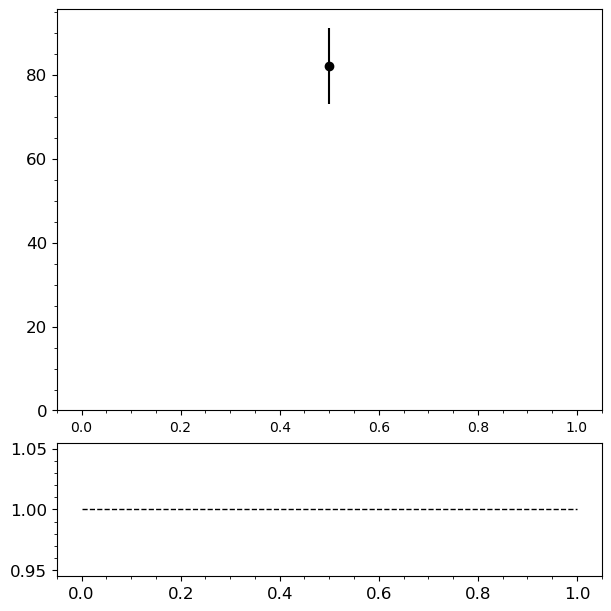

In [9]:
_ = cabinetry.visualize.data_mc(model_prefit, data)

Next up is a maximum likelihood fit. As we have limited sensitivity to the signal in this setup, we fit a background-only model with the signal normalization fixed to zero.

In [ ]:
init_pars = model.config.suggested_init()
init_pars[model.config.poi_index] = 0

fix_pars = model.config.suggested_fixed()
fix_pars[model.config.poi_index] = True

fit_results = cabinetry.fit.fit(model, data, init_pars=init_pars, fix_pars=fix_pars)
print(fit_results)

We can now visualize the post-fit distributions. To do so, we need a post-fit model prediction. It is obtained like the pre-fit model prediction, but this time with an additional argument to pass in the fit results.

In [ ]:
model_postfit = cabinetry.model_utils.prediction(model, fit_results=fit_results)
_ = cabinetry.visualize.data_mc(model_postfit, data)

The nuisance parameter pulls and correlations are visualized below.

In [ ]:
cabinetry.visualize.pulls(fit_results)

In [ ]:
cabinetry.visualize.correlation_matrix(fit_results, pruning_threshold=0.2)

In [ ]:
#ranking_results = cabinetry.fit.ranking(model, data)
#cabinetry.visualize.ranking(ranking_results)

In [ ]:
# poi_index=model.config.poi_index
# parameter_bounds = model.config.suggested_bounds()
# parameter_bounds[poi_index] = [-10.0, 10.0]

# scan_results = cabinetry.fit.scan(model, data, model.config.poi_name, par_range=[-10,10],par_bounds=parameter_bounds)
# cabinetry.visualize.scan(scan_results)

In [ ]:
poi_index=model.config.poi_index
parameter_bounds = model.config.suggested_bounds()
parameter_bounds[poi_index] = [-10.0, 100.0]

limit_results = cabinetry.fit.limit(model, data, par_bounds=parameter_bounds)
cabinetry.visualize.limit(limit_results)

In [ ]:
significance_results = cabinetry.fit.significance(model, data)
print(significance_results)

In [ ]:
#Dictionary to store all the results
results = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
    }

patchsets = ["sbottom_600_180_50","sbottom_700_131_1","sbottom_800_131_1"]
patchsets = ["LQd_M1000_B0p05","LQd_M2000_B0p05"]
#patchsets = ["Htb/Hp500_config.json","Htb/Hp1000_config.json","Htb/Hp1400_config.json","Htb/Hp2000_config.json"]

for patch in patchsets:
    # Apply the patch to build a patched model
    patched_ws = patchset.apply(ws_bkg, patch)
    #patched_ws = pyhf.Workspace(json.load(open(patch)))
    patched_model =  patched_ws.model()
    patched_data = patched_ws.data(patched_model)
    
    #Set to expected only
    pars = patched_model.config.suggested_init().copy()
    pars[patched_model.config.poi_index] = 0.0
    patched_data = patched_model.expected_data(pars)
    
    #Fix systematics:
    #fixed_params = [{"name": p, "fixed": False} for p in patched_model.config.parameters if p != patched_model.config.poi_name]
    fixed_params = [(p,p != patched_model.config.poi_name) for p in patched_model.config.parameters]
    #fixed_params = [{"name": p, "fixed": False} for p in patched_model.config.parameters]
    #fixed_params = model.config.suggested_fixed()
    #fixed_params = [p!= patched_model.config.poi_name for p in patched_model.config.parameters]
    
    fixed_params = [True for p in patched_model.config.parameters]
    fixed_params[patched_model.config.poi_index]=False
    
    #for ii,p in enumerate(patched_model.config.parameters): print(ii,p,p==patched_model.config.poi_name)
    
    print(fixed_params)
    print(patched_model.config.poi_name)
    print("POI:", patched_model.config.poi_name, patched_model.config.poi_index)
    #print("Frozen parameters:", [fp for fp in fixed_params])
    print(fixed_params[model.config.poi_index])    
    
    #Similar dictionary to hold the scan results for each patchset
    CLs = { 
        "obs": [],
        "median": [], 
        "minus1": [], "minus2": [], 
        "plus1": [], "plus2": [] 
    }

    mu_values=np.linspace(0,3,10)
    #Scan over poi values
    for mu in mu_values:
        # observed CLs
        obs = pyhf.infer.hypotest(mu, patched_data, patched_model, test_stat="qtilde",fixed_params=fixed_params)
        CLs["obs"].append(obs)

        # expected bands
        exp,bands = pyhf.infer.hypotest(mu, patched_data, patched_model, test_stat="qtilde",fixed_params=fixed_params, return_expected_set=True)
        CLs["median"].append(exp)
        CLs["plus2"].append(bands[0])
        CLs["plus1"].append(bands[1])
        CLs["minus1"].append(bands[2])
        CLs["minus2"].append(bands[3])
        
        print(f"For {patch} and poi={mu}: obs={obs}, exp={exp}, bands=({bands[3]},{bands[2]},{bands[1]},{bands[0]})")

    # Interpolate where CLs = 0.05
    results["obs"].append(np.interp(0.05, CLs["obs"][::-1], mu_values[::-1])) #[::-1] just to reverse the list for np.interp
    results["median"].append(np.interp(0.05, CLs["median"][::-1], mu_values[::-1]))
    results["minus1"].append(np.interp(0.05, CLs["minus1"][::-1], mu_values[::-1]))
    results["minus2"].append(np.interp(0.05, CLs["minus2"][::-1], mu_values[::-1]))
    results["plus1"].append(np.interp(0.05, CLs["plus1"][::-1], mu_values[::-1]))
    results["plus2"].append(np.interp(0.05, CLs["plus2"][::-1], mu_values[::-1]))

In [ ]:
print(results)

In [ ]:
x = np.arange(len(results["obs"]))  # Replace with real mass points if available

plt.figure(figsize=(8,5))

# +/-  1/2sigma band (green,yellow)
plt.fill_between(x, results["minus2"], results["plus2"], color="gold", label=r"$\pm 2\sigma$ expected", alpha=0.6)
plt.fill_between(x, results["minus1"], results["plus1"], color="limegreen", label=r"$\pm 1\sigma$ expected", alpha=0.8)

# Median expected
plt.plot(x, results["median"], linestyle="--", color="gray", label="Expected")

# Observed
plt.plot(x, results["obs"], linestyle="", color="black", marker="o", label="Observed")

plt.xlabel("Signal Model Index (or Mass)")
plt.ylabel(r"95% CL Upper Limit on $\mu$")
plt.title("Exclusion Limits Across Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
